# Estudos sobre Séries Temporais - Conceitos e Forecast

### Séries temporais são conjuntos de dados que seguem uma ordem (bem preenchida) de datas - seja quebrado por dia, mês ou ano.

### Componentes:

- ##### Tendência
- ##### Sazonalidade
- ##### Ciclo
- ##### Erro

|Componente|Explicação|
|:--:|:--:|
|Tendência|Padrão de Crescimento ou Queda|
|Sazonalidade|Padrão de comportamento em faixas de tempo (janelas menores)|
|Ciclos|São eventos de crescimento ou quedas cíclicas, não são efeitos de tendência ou sazonalidade mas se efeitos de fora|
|Erro|Aquilo que não pode ser explicado, que não faz parte nem de tendência, sazonalidade ou ciclo - a matemática não explica|

# Mais conceitos Gerais

## **Autocorrelação**

### Autocorrelação é a relação entre intervalos da variável na série temporal (a relação entre dois pontos no período)

A autocorrelação mede através de lags escolhidos, a relação sendo -1 forte negativa, 1 forte positiva e 0 sem autocorrelação

-1 - 0 - 1

Lags é a janela dessa autocorrelação. Por exemplo, se escolhemos 1 Lag queremos analisar a autocorrelação de hoje com ontem. Se 2, calculamos a auto correlação de hoje com os últimos dois dias

$$\rho_k = \frac{\sum_{t=k+1}^n (Y_t - \bar{Y}) (Y_{t-k} - \bar{Y})}{\sum_{t=1}^n (Y_t - \bar{Y})^2}$$

Onde:

- $\rho_k$ é a autocorrelação no lag $k$.
- $Y_t$ é o valor da série temporal no tempo $t$.
- $Y_{t-k}$ é o valor da série temporal defasado por $k$ períodos.
- $\bar{Y}$ é a média da série temporal.
- $n$ é o número total de observações na série temporal.


### Gráficos

Existem dois gráficos que demonstram de forma direta a autocorrelação:

- ACF
- PACF

Ambos os gráficos são desenhados de forma a que no eixo $y$ está a força da autocorrelação e no eixo $x$ os lags. Neles há uma linha tracejada que indica o nível de significância dessa autocorrelação, ou seja, caso o valor passe essa linha, temos então autocorrelação naquele lag. Lembrando que o gráfico está medindo a partir da última data da série com relação ao lag.

Esses gráficos são usados para ajudar na modelagem de séries temporais, por exemplo, na escolha dos parâmetros para modelos ARIMA. Eles fornecem insights sobre a estrutura de dependência temporal nos dados e ajudam a identificar se a série temporal é estacionária ou se precisa de diferenciação.

***Usamos o ACF quando queremos autocorrelação de lags acumulados. Por exemplo, no lag 4 do gráfico a autocorrelação é dada por hoje e do lag 2 + lag 3 + lag 4</br>***
***Já o PACF faz autocorrelação entre os pontos escolhidos, se escolho lag 4 a autocorrelação se dá por hoje e o 4 período anterior***

Séries sem autocorrelação, ou menos de 5% entre os intervalo damos o nome de Dados Aleatórios ou Ruído Branco


O teste para autocorrelação é o teste de Ljung-Box onde p_value > 0.05 não há autocorrelação    


## **Residuais e Métricas de Desempenho**

#### Para forecast é preciso entender ideias de residuos e valores ajustados

Quando fazemos uma previsão em dados de treino para treinar um modelo de Forecast, criamos uma reta que tenta se ajustar aos dados originais. Essa reta produz valores ajustados.
Resíduos, nesse caso, nada mais são que a diferença entre os valores reais e os valores ajustados, eles são a diferença ou o Erro da sua previsão para os dados reais.

As métricas de desempenho para avaliar qualidade do seu modelo de Forecasting se resume, como em Regressões, em MAE, RMSE E MAPE

- #### Residuais:
- 
$$e_t = Y_t - \hat{Y}_t$$


$e_t$ é o resíduo no tempo $t$.
$Y_t$ é o valor observado no tempo $t$.
$\hat{Y}_t$ é o valor previsto pelo modelo no tempo $t$.

</br>

- #### MAE:

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y}_i|$$

$Y_i$ é o valor real no tempo $i$;
$\hat{Y}_i$ é o valor previsto no tempo $i$;
$n$ é o número total de observações.

</br>

- #### RMSE:
 
$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}$$


$Y_i$ é o valor real no tempo $i$;
$\hat{Y}_i$ é o valor previsto no tempo $i$;
$n$ é o número total de observações.
</br>

- #### MAPE:

$$\text{MAPE} = \frac{1}{n} \sum_{t=1}^n \left| \frac{Y_t - \hat{Y}_t}{Y_t} \right| \times 100\%$$


$\text{MAPE}$ é o erro percentual absoluto médio.
$n$ é o número total de observações.
$Y_t$ é o valor observado no tempo $t$.
$\hat{Y}_t$ é o valor previsto pelo modelo no tempo $t$.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Sobre datas no Python

#### Um pouco sobre funções e bibliotecas de datas no Python

In [53]:
from datetime import datetime
#datetime cria data passando params na seguinte ontem (y, m, d)
dt = datetime(year=2019, month=7, day=7)
dt

datetime.datetime(2019, 7, 7, 0, 0)

In [54]:
# parser é usado para transformar string em data e hora
from dateutil import parser
date = parser.parse('26 of October, 2023')

date

datetime.datetime(2023, 10, 26, 0, 0)

In [55]:
date = parser.parse('October 26th, 2023')
date

datetime.datetime(2023, 10, 26, 0, 0)

In [56]:
import pandas as pd
#parse_date[0] -> doluna 0 deve ser lida como data
#index_col = coluna 0 sera o index 
df = pd.read_csv('female_birth.csv', parse_dates=[0], index_col=0)

In [57]:
df.rename(columns={
          'Daily total female births in California, 1959': 'Number of Births'}, inplace=True)

In [58]:
df = df.iloc[(df.index != 'Daily total female births in California')]

In [59]:
df

,Number of Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [60]:
# vale a pena transformar um dataframe em uma série quando se faz analise de séries temporais, não que não possa ser feito por DF
# para isso usamos o df.squeeze('columns')
df = df.squeeze('columns')

In [61]:
def dateparse(dates): return pd.to_datetime(dates, format="%Y-%m")
#date_parser aplica a função para mudar o formato da coluna indicada como data pelo parse_dates
airpass = pd.read_csv('AirPassengers.csv', parse_dates=[
                      'Month'], date_parser=dateparse, index_col ='Month')

C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_11412\3532105288.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  airpass = pd.read_csv('AirPassengers.csv', parse_dates=[


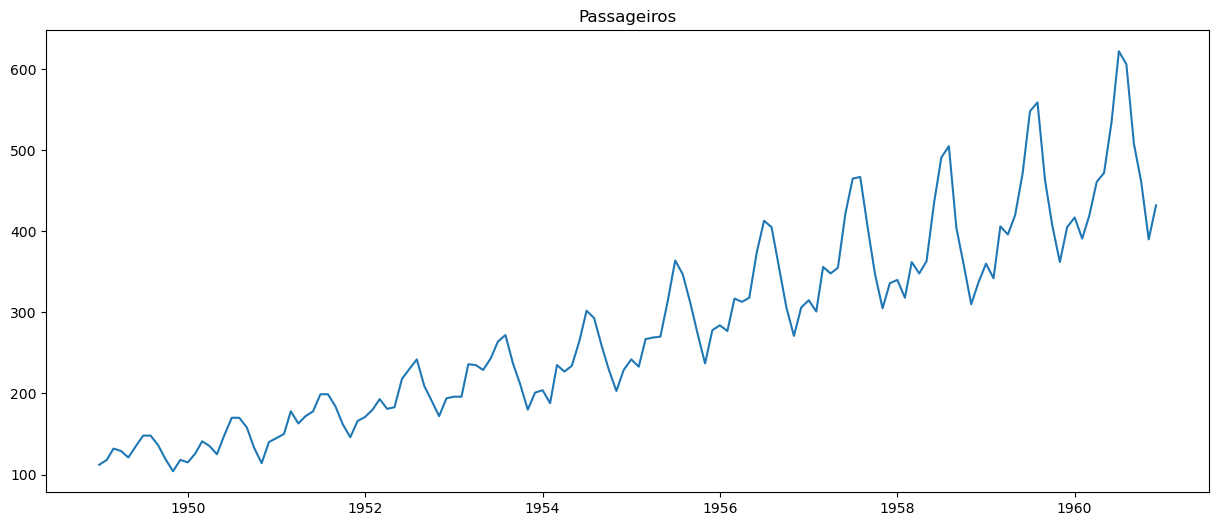

In [62]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 6


register_matplotlib_converters()  # sempre usar quando for imprimir datas no plot
plt.plot(airpass)
plt.title('Passageiros')
plt.show()

# Média Móvel

### Média móvel causa alguns efeitos em séries temporais:

- ### Suaviza a série
- ### Remove Outliers e picos de sazonalidade
- ### Expõe a tendência da série (super útil em longas séries diárias)

 **O cálculo da média móvel consiste em calcular a média de um determinado número de pontos consecutivos em uma série temporal, deslizando essa janela ao longo da série.**

$$\text{Média Móvel}_t = \frac{1}{n} \sum_{i=0}^{n-1} X_{t-i}$$




- $n$ é o número de períodos considerados para calcular a média móvel; </br>
- $X_{t-i}$ representa o valor da série temporal no tempo $t-i$;</br>
- $\sum_{i=0}^{n-1}$ acumula os valores dos últimos $n$ períodos.</br>

</br>
Antes, definimos a quantidade de períodos para o cálculo</br>
Por exemplo suponhamos que temos a tabela:

|Data|Valor|
|:--:|:--:|
|Janeiro|10|
|Fevereiro|5|
|Março|8|
|Abril|12|
|Maio|7| 

Suponhamos que hoje seja Maio e queremos a média móvel de 3 períodos, seria algo assim:

|Data|Valor|Cálculo|Média Móvel|
|:--:|:--:|:--:|:--:|
|Janeiro|10|(10 + NaN + NaN) /3|NaN|
|Fevereiro|5|(5 + 10 + NaN) /3|NaN|
|Março|8|(8 + 5 + 10) /3|7,66|
|Abril|12|(12 + 8 + 5) /3|8,33|
|Maio|7|(7 + 12 + 8) /3|9|

***Nota-se que quando calculamos a média móvel, quando o cálculo possuí algum período sem valor o valor retornado é NaN, você notará que alguns meses ou anos ou até dias se perdem. Sempre use .fittedvalues do python para corrigir valores NaN's***

In [63]:
p = airpass[['#Passengers']]

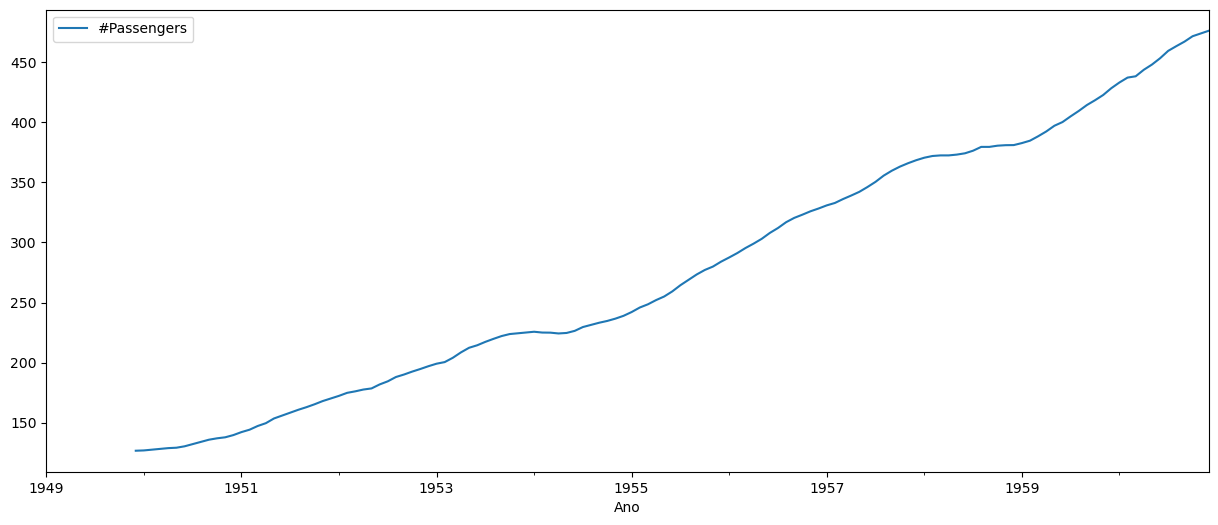

In [64]:
# serie.rolling(ordem).mean() -> média movel de ordem - ordem
p.rolling(12).mean().plot()
plt.xlabel('Ano')
plt.show()

Veja como suavizamos nossos dados e como perdemos algumas informações anteriores

# Previsão com média móvel

Aqui a ideia é escolher uma boa janela de ordem para calcular o futuro. Para descobrir a melhor, basta testar diversas ordens e calcular uma métrica de erro para tal e definir a melhor

In [65]:
def dateparse(dates): return datetime.strptime(dates, '%Y-%m')


data = pd.read_csv('AirPassengers.csv', parse_dates=[
                   'Month'], index_col='Month', date_parser=dateparse)

C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_11412\1076521016.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('AirPassengers.csv', parse_dates=[


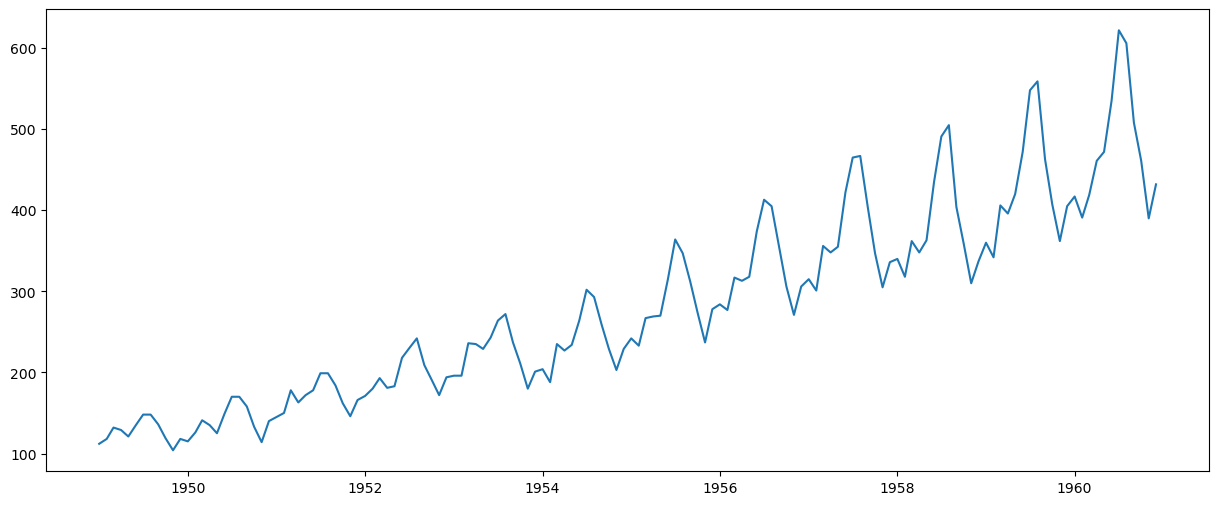

In [66]:
plt.plot(data)

# Decomposição

### Decomposição é o método de separar os componentes da série temporal
 
#### Dentre motivos para isso temos:

- Indentificar Sazonalidade, Ciclos e Ruídos (Erros)
- Melhorar modelagens de Forecasting -> podemos aplicar modelos apenas a parte sazonal ou tendencia (depende do seu negócio)
- Auxilia na leitura das estruturas dos seus dados
- Identifica padrões

#### Há dois métodos de decomposição:

|Método|Quando usar|Fórmula|
|:--:|:--:|:--:|
|Aditivo|Se a variação sazonal e o ruído parecem constantes ao longo do tempo, um modelo aditivo pode ser mais apropriado.|$Y_t = T_t + S_t + E_t$|
|Multiplicativo|Se a amplitude da sazonalidade ou o ruído aumenta com o nível da série temporal, considere o modelo multiplicativo.|$Y_t = T_t \times S_t \times E_t$|

#### Aditivo - acredita-se que o nível da sazonalidade de mantém ao longo do período

- $Y_t$ é o valor observado da série temporal no tempo $t$;
- $T_t$ é o componente de tendência;
- $S_t$ é o componente sazonal;
- $E_t$ é o componente de erro ou ruído.
- 
#### Multiplicativo - Acredita-se que a sazonalidade aumenta seu nível ao longo do período

- $Y_t$ é o valor observado da série temporal no tempo $t$;
- $T_t$ é o componente de tendência;
- $S_t$ é o componente sazonal;
- $E_t$ é o componente de erro ou ruído.

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [68]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [69]:
result = seasonal_decompose(data, model='multiplicative')

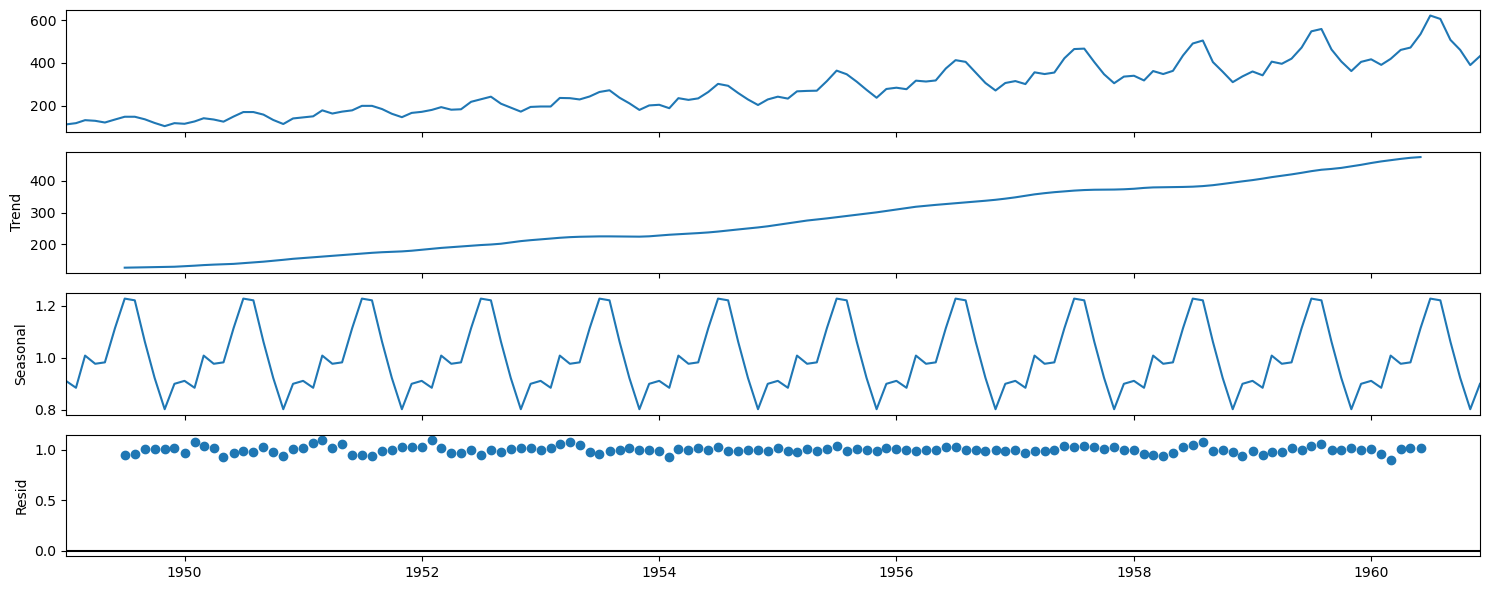

In [70]:
result.plot()
plt.show()

In [71]:
result2 = seasonal_decompose(data, model='aditive')

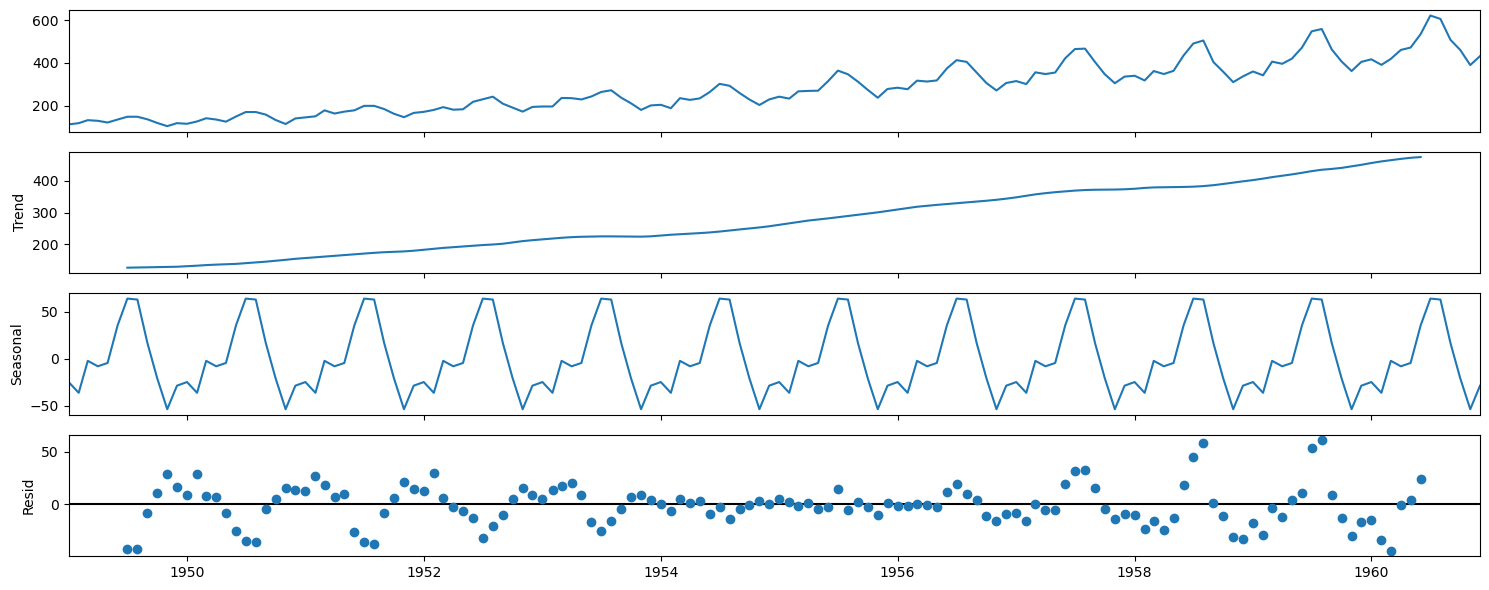

In [72]:
result2.plot()
plt.show()

# Teste de estacionariedade

## **Séries Estacionárias**

Séries estacionárias são séries que mantém uma mesma média e variância ao longo dos dados

Normalmente séries com Tendência e Sazonalidade não são estacionárias. Mas com apenas sazonalidade pode haver

Podemos transformar séries em séries estacionárias aplicando transformações $log()$, Diferenciação ou $Log$-Diferenciação como iremos ver

Teste Adfuller para Séries estacionárias, caso p_value > 0.05, não temos estacionariedade

In [73]:
from statsmodels.tsa.stattools import adfuller

X = data['#Passengers']
result = adfuller(X)
print(result)

# P-value > 0.05 -> não é estacionária

(0.8153688792060547, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


### Tornando uma série estacionária com Log - alguns modelos pressupõem que os dados são estacionários

-> log não se pode aplicar uma vez atrás da outra

In [74]:
import numpy as np
d_log = np.log(data)

In [75]:
adfuller(d_log)

(-1.717017089106965,
 0.422366774770389,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

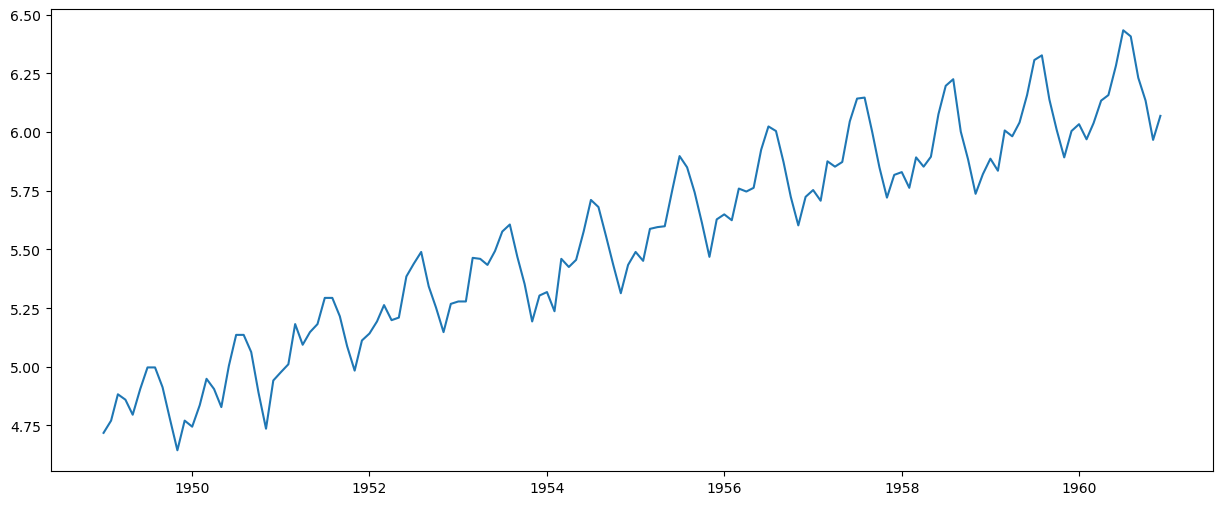

In [76]:
plt.plot(d_log)

### Diferenciação para transformar dados em série estacionárias

Diferenciação pode-se ser aplicada em escala

In [77]:
def dateparse(dates): return datetime.strptime(dates, '%Y-%m')


data = pd.read_csv('AirPassengers.csv', parse_dates=[
                   'Month'], index_col='Month', date_parser=dateparse)

C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_11412\1076521016.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('AirPassengers.csv', parse_dates=[


In [78]:
def adf_test(y):
    print('Resultado do teste: ')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=[
                         'Teste', 'Valor p', '# de lags', "# de observações"])
    for key, value in dftest[4].items():
        dfoutput['Valores Críticos ({})'.format(key)] = value
    print(dfoutput)

In [79]:
y = data['#Passengers']

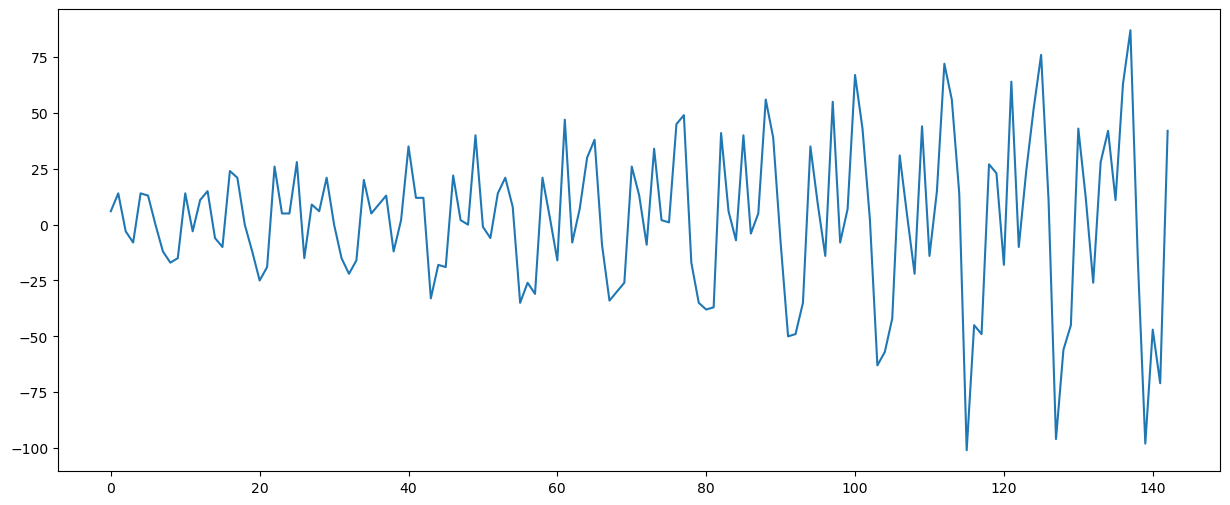

In [80]:
y_diff = np.diff(y)

plt.plot(y_diff)

In [81]:
adf_test(y_diff)

Resultado do teste: 
Teste                      -2.829267
Valor p                     0.054213
# de lags                  12.000000
# de observações          130.000000
Valores Críticos (1%)      -3.481682
Valores Críticos (5%)      -2.884042
Valores Críticos (10%)     -2.578770
dtype: float64


In [82]:
y_diff2 = np.diff(y_diff)
adf_test(y_diff2)

Resultado do teste: 
Teste                    -1.638423e+01
Valor p                   2.732892e-29
# de lags                 1.100000e+01
# de observações          1.300000e+02
Valores Críticos (1%)    -3.481682e+00
Valores Críticos (5%)    -2.884042e+00
Valores Críticos (10%)   -2.578770e+00
dtype: float64


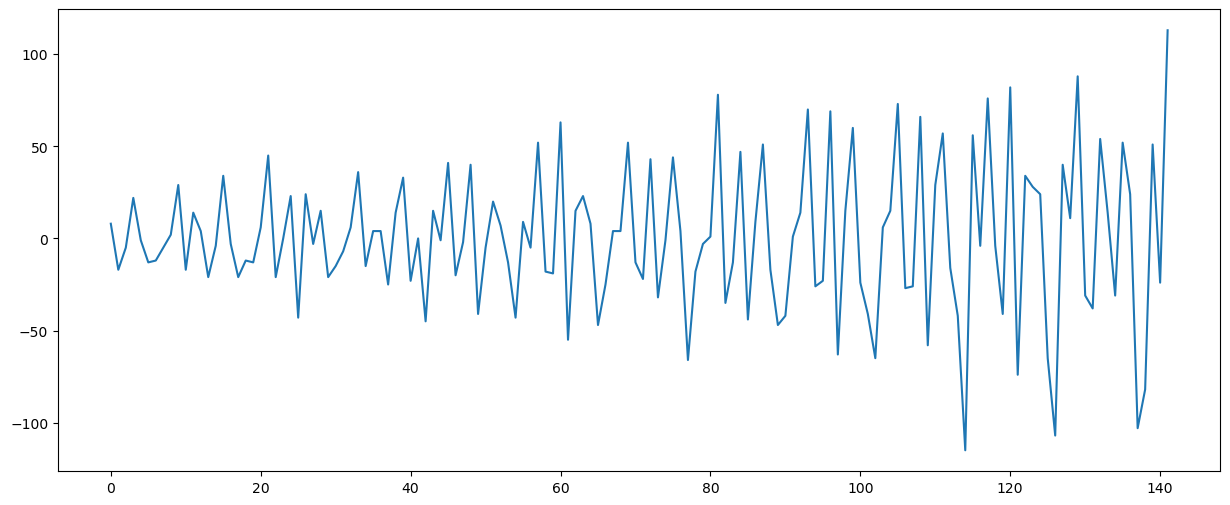

In [83]:
plt.plot(y_diff2)

### Técnica Diferenciação com Log

Nessa técnica fazemos o log e com os dados log usamos a média móvel (que também remove um pouco a tendência e sazonalidade -> e isso torna a série estacionária) e subtraímos esse valor com o valor de log

In [84]:
log_data = np.log(data)

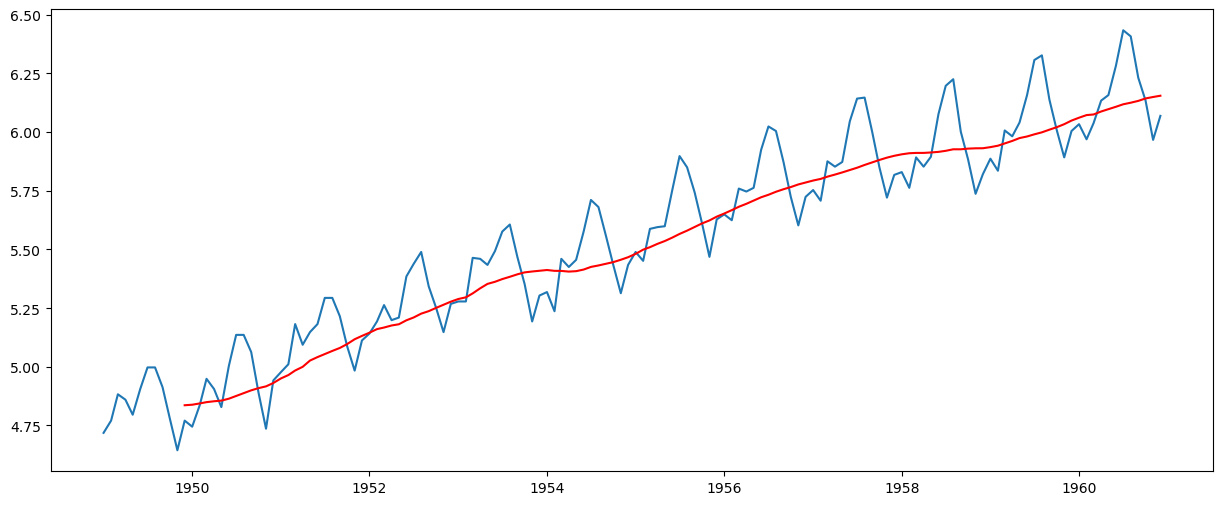

In [85]:
movel_data = log_data.rolling(12).mean()
plt.plot(log_data)
plt.plot(movel_data, color='r')

In [86]:
# agora subtraímos

data_log_menos_movel = log_data - movel_data

# vão ser gerados valores NaN, precisamos removê-los

data_log_menos_movel.dropna(inplace=True)

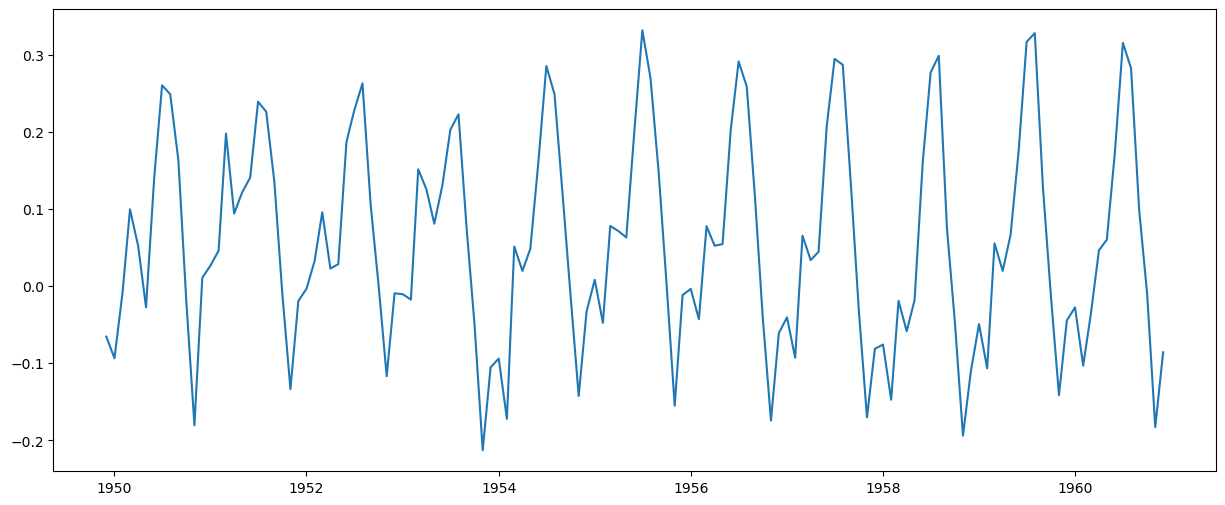

In [87]:
plt.plot(data_log_menos_movel)

In [88]:
adf_test(data_log_menos_movel)

Resultado do teste: 
Teste                      -3.162908
Valor p                     0.022235
# de lags                  13.000000
# de observações          119.000000
Valores Críticos (1%)      -3.486535
Valores Críticos (5%)      -2.886151
Valores Críticos (10%)     -2.579896
dtype: float64


# Removendo tendência com Regressão



In [89]:
from sklearn.linear_model import LinearRegression

x = np.array(range(len(data))).reshape(-1, 1)
y = data.values

model = LinearRegression()
model.fit(x, y)

# vai construir uma reta de melhor ajustes de TENDE a seguir a tendência
trend = model.predict(x)
detrended = y - trend

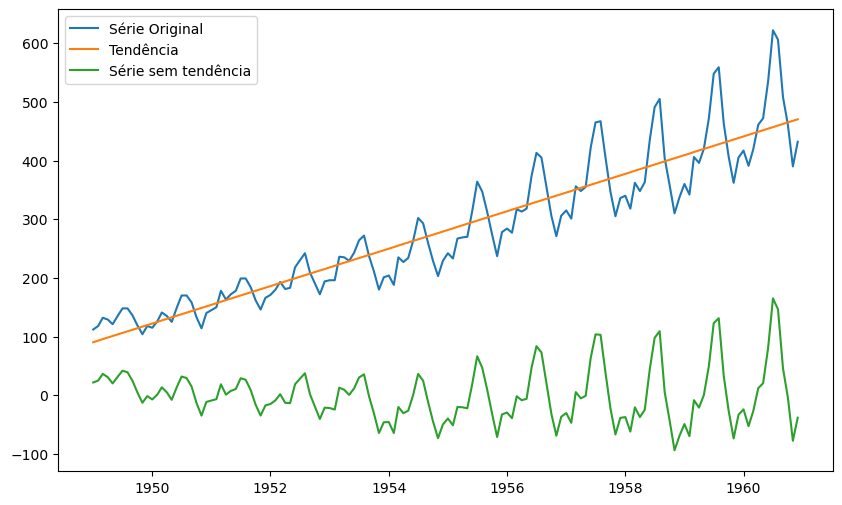

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Série Original')
plt.plot(data.index, trend, label='Tendência')
plt.plot(data.index, detrended, label='Série sem tendência')
plt.legend()
plt.show()

In [91]:
# Remvocendo a sazonalidade
seasonal_diff = detrended[12:] - detrended[:-12]

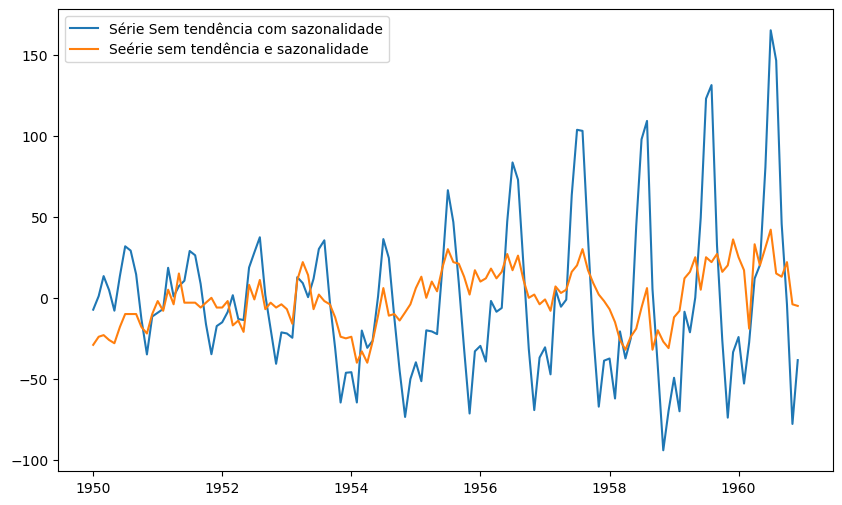

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(data.index[12:], detrended[12:],
         label='Série Sem tendência com sazonalidade')
plt.plot(data.index[12:], seasonal_diff,
         label='Seérie sem tendência e sazonalidade')
plt.legend()
plt.show()

# Forecasting

A meta da previsão é minimizar o erro, visto que conceitualmente deve-se entender a previsão como errada. O mundo sofre de extrema aleatoriedade, pense em como se fosse jogar uma granada, há variáveis que mesmo controladas podem sofrer alterações aleatorias e/ou há variáveis que não foram medidas ou percebidas

Previsão em séries temporais sempre signifca extrapolação, sempre estamos prevendo para frente e dados anteriores apenas servem para fins de treino.

Além disso, modelos de previsão de forecasting apenas funcionam quando há padrões nos dados e não simplesmente dados aleatórios (sem tendência ou sazonalidade ou alguma correlação), neste caso qualquer previsão não será melhor que simplesmente tentar adivinhar 

Vale a pena notar, também, que quanto mais distante tentamos prever, mais a variabilidade, menor a certeza dessa previsão (menor previsibilidade - o mundo muda muito ao longo do tempo (o modelo entende que o mundo muda ao longo prazo, então ele mesmo aumenta essa variabilidade ao longo do tempo)) e dados mais anteriores, menor peso eles possuem.

Vale a pena não apenas passar o ponto previsto mas os níveis de confiança (intervalos de confiança) de cada ponto previsto (isso aumenta e melhor a ideia do modelo)

#### Dicas Gerais:

- Primeiros modelos, quase sempre, podem ser melhorados

- Residuais conforme nem sempre inficam o melhor modelo

- Sempre selecione bem as variáveis


sempre avalie os resíduos, a performance com RMSE, MAE E MAPE e BIC e AIC

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Média Móvel 

A média móvel é uma técnica simples e intuitiva para suavizar séries temporais e fazer previsões. Ela é particularmente útil para eliminar ruídos ou variações curtas, revelando tendências e padrões subjacentes. No entanto, sua aplicabilidade como modelo de previsão depende da natureza dos dados.

## Como funciona? 

A média móvel é calculada como a média de um determinado número de pontos de dados consecutivos. Existem várias formas de médias móveis, mas as duas mais comuns são:

</br>

### Móvel Simples (SMA - Simple Moving Average): É a média simples de um número fixo de valores anteriores.
$$
SMA_t = \frac{1}{n} \sum_{i=0}^{n-1} Y_{t-i}
$$

**Onde:**
- $SMA_t$ é a média móvel no tempo $t$.
- $n$ é o número de períodos usados para calcular a média.
- $Y_{t-i}$ são os valores da série temporal nos $n$ períodos anteriores.
- 
</br>

### Média Móvel Exponencial (EMA - Exponential Moving Average): Dá mais peso aos valores mais recentes, ajustando-se mais rapidamente às mudanças.
$$
EMA_t = \alpha Y_t + (1-\alpha) EMA_{t-1}
$$

**Onde:**
- $EMA_t$ é a média móvel exponencial no tempo $t$.
- $\alpha$ é o fator de suavização, calculado como $\alpha = \frac{2}{n+1}$.
- $Y_t$ é o valor atual da série temporal no tempo $t$.
- $EMA_{t-1}$ é o valor da média móvel exponencial no tempo $t-1$.

## Pontos Negativos

Previsões de Curto Prazo: A média móvel é melhor para previsões de curto prazo e suavização de dados. Para previsões de longo prazo, modelos mais complexos como ARIMA, SARIMA ou modelos baseados em aprendizado de máquina podem ser mais eficazes.

Não Captura Sazonalidade ou Tendências Complexas: A média móvel não lida bem com padrões sazonais ou tendências complexas, pois simplesmente suaviza os dados sem modelar explicitamente esses componentes.

Impacto de Gaps e Falhas: Embora a média móvel possa ajudar em séries com gaps e falhas, essas irregularidades ainda podem comprometer a precisão das previsões. Preenchimento dos gaps antes de aplicar a média móvel pode melhorar os resultados.

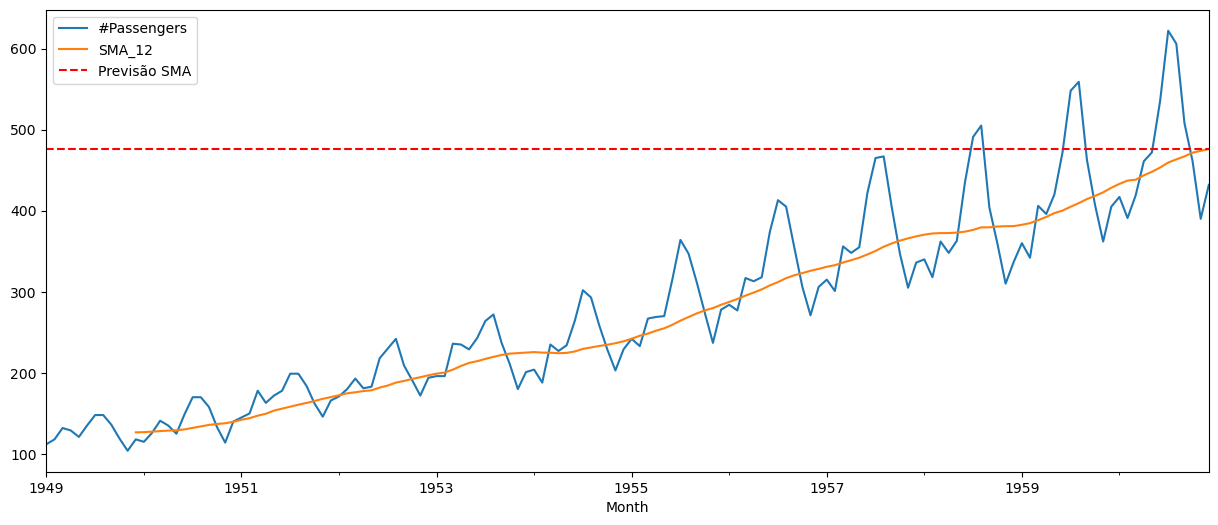

In [154]:
# Carregar os dados
df = pd.read_csv('airpassengers.csv', index_col='Month', parse_dates=True)

# Aplicar a média móvel simples
df['SMA_12'] = df['#Passengers'].rolling(window=12).mean()

# Prever o próximo valor
last_12_months = df['#Passengers'][-12:]
forecast_sma = last_12_months.mean()

# Visualizar os dados e a média móvel
df[['#Passengers', 'SMA_12']].plot()
plt.axhline(y=forecast_sma, color='red', linestyle='--', label='Previsão SMA')
plt.legend()
plt.show()

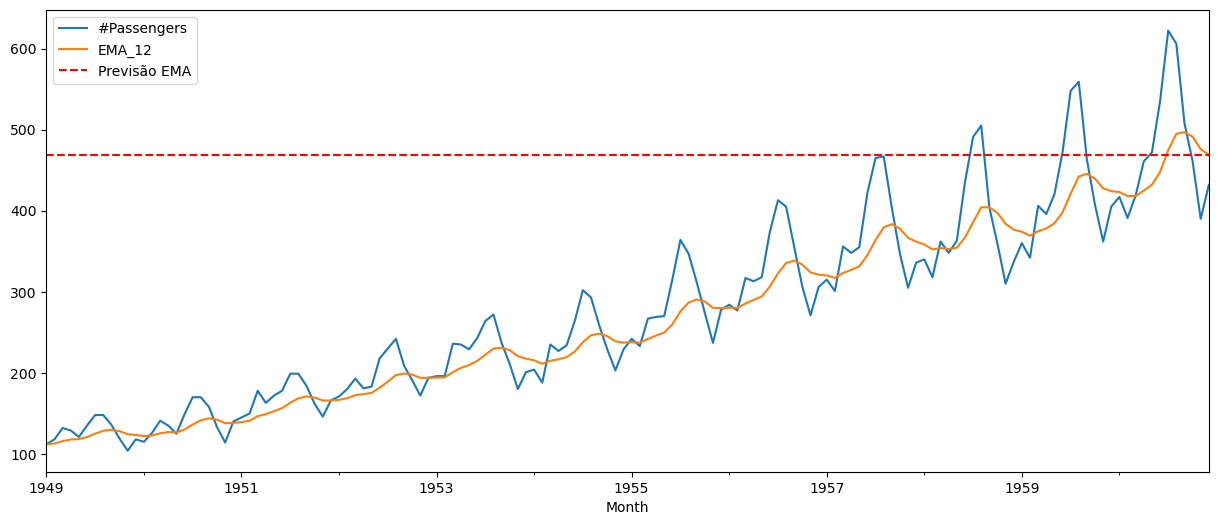

In [155]:
# Aplicar a média móvel exponencial
df['EMA_12'] = df['#Passengers'].ewm(span=12, adjust=False).mean()

# Prever o próximo valor
forecast_ema = df['EMA_12'].iloc[-1]  # O valor da EMA mais recente

# Visualizar os dados e a média móvel exponencial
df[['#Passengers', 'EMA_12']].plot()
plt.axhline(y=forecast_ema, color='red', linestyle='--', label='Previsão EMA')
plt.legend()
plt.show()

## Suavização Exponencial


Suavização exponencial é uma técnica de previsão que utiliza uma média ponderada de observações passadas para prever valores futuros. Ela dá maior peso às observações mais recentes, enquanto as mais antigas recebem menos peso, o que a torna útil para séries temporais onde as condições mudam ao longo do tempo.

- Considera que observações passadas *possuem* peso

- Quanto mais recente a observação, maior seu peso

- Faz por média, quanto mais distante a observação menor a média

- Os pesos de cada observação reduz a medida que aumenta-se o lag

###  - Suavização Exponencial Simples (SES) - É, simplesmente a média ponderada de observações passadas. Serve bem a séries temporais sem tendência ou sazonalidade. Lembre-se que o peso decresce a medida que prevemos para mais longe. Simplesmente é extrapolado seu valor.

**Fórmula da Suavização Exponencial Simples:**

$$
F_{t+1} = \alpha \cdot Y_t + (1 - \alpha) \cdot F_t
$$

**Onde:**

- $F_{t+1}$ é a previsão para o próximo período.
- $Y_t$ é o valor observado no período atual.
- $F_t$ é a previsão anterior.
- $\alpha$ é o fator de suavização, onde $0 \leq \alpha \leq 1$.

### - Hold Linear Trend - suavização exponencial para dados com tendência (porém a previsão cresce ao infinito)

**Fórmulas da Suavização Exponencial Holt Linear Trend:**

1. **Nível:**

   $$
   L_t = \alpha \cdot Y_t + (1 - \alpha) \cdot (L_{t-1} + T_{t-1})
   $$

2. **Tendência:**

   $$
   T_t = \beta \cdot (L_t - L_{t-1}) + (1 - \beta) \cdot T_{t-1}
   $$

3. **Previsão:**

   $$
   F_{t+m} = L_t + m \cdot T_t
   $$

**Onde:**

- $L_t$ é o nível no tempo $t$.
- $T_t$ é a tendência no tempo $t$.
- $Y_t$ é o valor observado no tempo $t$.
- $F_{t+m}$ é a previsão para $m$ períodos à frente.
- $\alpha$ é o fator de suavização para o nível, onde $0 \leq \alpha \leq 1$.
- $\beta$ é o fator de suavização para a tendência, onde $0 \leq \beta \leq 1$.
- $m$ é o número de períodos à frente que se deseja prever.

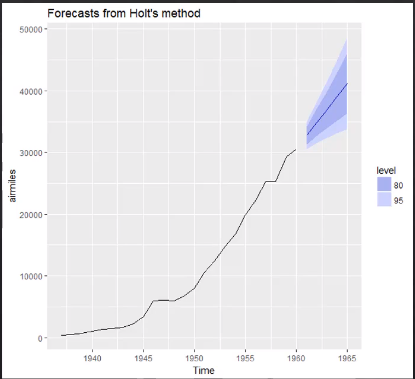

### - Tendência amortecida (ele amortece a previsão ad infinitum de Hold Linear por um novo parâmetro chamado de *param de amortecimento*)

**Fórmulas da Suavização Exponencial Holt Linear Trend Amortecida:**

1. **Nível:**

   $$
   L_t = \alpha \cdot Y_t + (1 - \alpha) \cdot (L_{t-1} + \phi \cdot T_{t-1})
   $$

2. **Tendência:**

   $$
   T_t = \beta \cdot (L_t - L_{t-1}) + (1 - \beta) \cdot \phi \cdot T_{t-1}
   $$

3. **Previsão:**

   $$
   F_{t+m} = L_t + \left(\frac{1 - \phi^m}{1 - \phi}\right) \cdot T_t
   $$

**Onde:**

- $L_t$ é o nível no tempo $t$.
- $T_t$ é a tendência no tempo $t$.
- $Y_t$ é o valor observado no tempo $t$.
- $F_{t+m}$ é a previsão para $m$ períodos à frente.
- $\alpha$ é o fator de suavização para o nível, onde $0 \leq \alpha \leq 1$.
- $\beta$ é o fator de suavização para a tendência, onde $0 \leq \beta \leq 1$.
- $\phi$ é o fator de amortecimento da tendência, onde $0 \leq \phi \leq 1$.
- $m$ é o número de períodos à frente que se deseja prever.

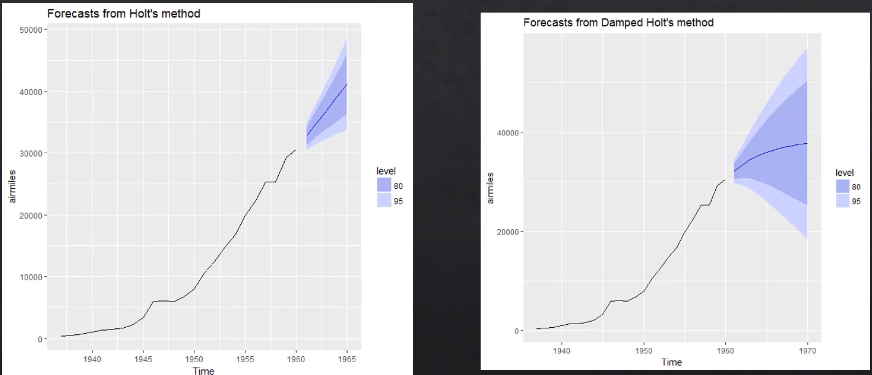

#### *Modelos Hold Linear trend e Damped são úteis quando não há sazonalidade*

### - Holt Winters Sazonal - inclui captura de sazonalidade pelo modelo. Comporta modelos *Aditivos* para variação sazonal constante e *Multiplicativo* para modelos que a sazonalidade varia ao longo da série

#### Aditivo: Adequado quando a variação sazonal é constante ao longo do tempo (sazonalidade tem amplitude constante).

**Fórmulas da Suavização Exponencial Holt-Winters Aditivo:**

1. **Nível:**

   $$
   L_t = \alpha \cdot \left(Y_t - S_{t-s}\right) + (1 - \alpha) \cdot (L_{t-1} + T_{t-1})
   $$

2. **Tendência:**

   $$
   T_t = \beta \cdot (L_t - L_{t-1}) + (1 - \beta) \cdot T_{t-1}
   $$

3. **Sazonalidade:**

   $$
   S_t = \gamma \cdot \left(Y_t - L_t\right) + (1 - \gamma) \cdot S_{t-s}
   $$

4. **Previsão:**

   $$
   F_{t+m} = L_t + m \cdot T_t + S_{t+m-s(k+1)}
   $$

**Onde:**

- $L_t$ é o nível no tempo $t$.
- $T_t$ é a tendência no tempo $t$.
- $S_t$ é o componente sazonal no tempo $t$.
- $Y_t$ é o valor observado no tempo $t$.
- $F_{t+m}$ é a previsão para $m$ períodos à frente.
- $\alpha$ é o fator de suavização para o nível, onde $0 \leq \alpha \leq 1$.
- $\beta$ é o fator de suavização para a tendência, onde $0 \leq \beta \leq 1$.
- $\gamma$ é o fator de suavização para a sazonalidade, onde $0 \leq \gamma \leq 1$.
- $s$ é o comprimento da sazonalidade (número de períodos em um ciclo sazonal).
- $k$ é o número de ciclos sazonais completos dentro dos $m$ períodos de previsão.

#### Multiplicativo: Usado quando a amplitude da sazonalidade aumenta ou diminui proporcionalmente ao nível da série (sazonalidade com amplitude variável).

**Fórmulas da Suavização Exponencial Holt-Winters Multiplicativo:**

1. **Nível:**

   $$
   L_t = \alpha \cdot \left(\frac{Y_t}{S_{t-s}}\right) + (1 - \alpha) \cdot (L_{t-1} + T_{t-1})
   $$

2. **Tendência:**

   $$
   T_t = \beta \cdot (L_t - L_{t-1}) + (1 - \beta) \cdot T_{t-1}
   $$

3. **Sazonalidade:**

   $$
   S_t = \gamma \cdot \left(\frac{Y_t}{L_t}\right) + (1 - \gamma) \cdot S_{t-s}
   $$

4. **Previsão:**

   $$
   F_{t+m} = \left(L_t + m \cdot T_t\right) \cdot S_{t+m-s(k+1)}
   $$

**Onde:**

- $L_t$ é o nível no tempo $t$.
- $T_t$ é a tendência no tempo $t$.
- $S_t$ é o componente sazonal no tempo $t$.
- $Y_t$ é o valor observado no tempo $t$.
- $F_{t+m}$ é a previsão para $m$ períodos à frente.
- $\alpha$ é o fator de suavização para o nível, onde $0 \leq \alpha \leq 1$.
- $\beta$ é o fator de suavização para a tendência, onde $0 \leq \beta \leq 1$.
- $\gamma$ é o fator de suavização para a sazonalidade, onde $0 \leq \gamma \leq 1$.
- $s$ é o comprimento da sazonalidade (número de períodos em um ciclo sazonal).
- $k$ é o número de ciclos sazonais completos dentro dos $m$ períodos de previsão.

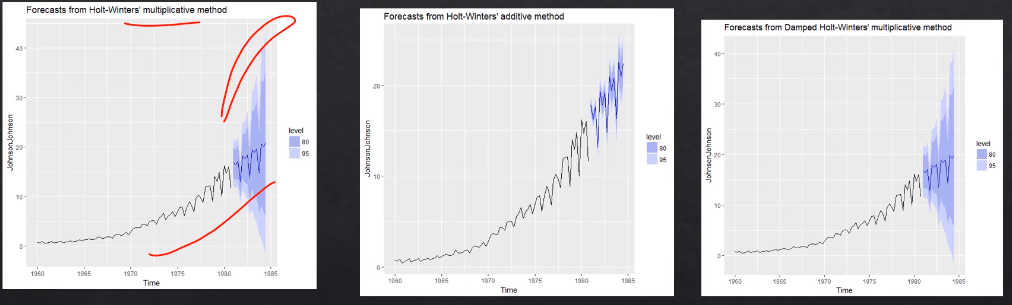

### - ETS -> suporta sazonalidade e tendência. Nele voce informa o erro, a tendência e a sazonalidade 

Permite a especificação do comportamento de cada componente, resultando em modelos como ETS(A,A,A) (Erro Aditivo, Tendência Aditiva, Sazonalidade Aditiva), ou ETS(M,A,M) (Erro Multiplicativo, Tendência Aditiva, Sazonalidade Multiplicativa), e assim por diante.

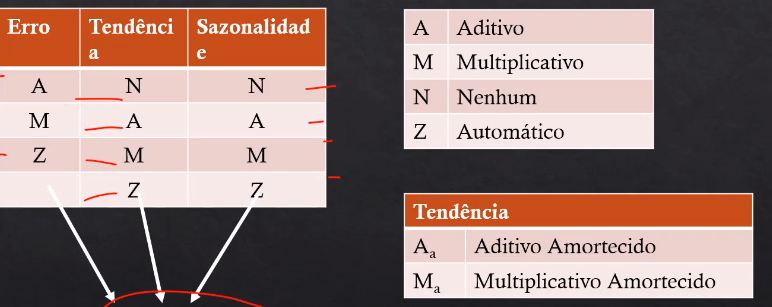

In [93]:
stock = pd.read_csv('all-stocks-2006-01-01-to-2018-01-01.csv',
                    index_col='Date', parse_dates=['Date'])

In [94]:
stock.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [95]:
g_stk = stock.query('Name == "GOOGL"')

In [96]:
g_stk

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
...,...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL


In [97]:
g_stk = g_stk.copy()

# essa coluna irá servir para ordernar os dados
g_stk['Ticks'] = range(0, len(g_stk))

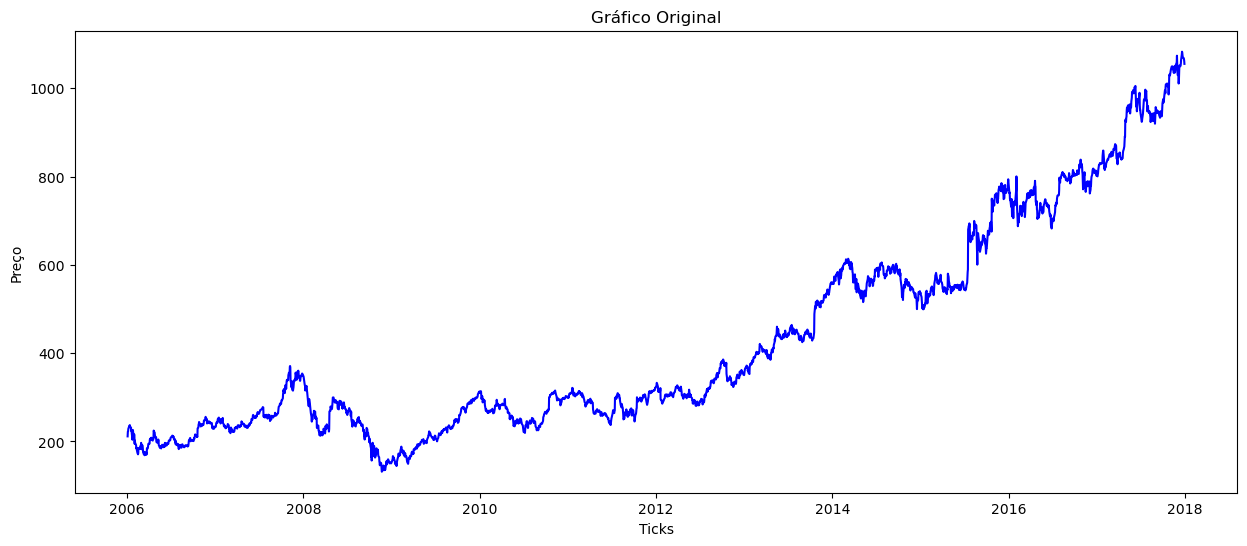

In [98]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Preço')
ax1.set_title('Gráfico Original')
ax1.plot('Open', data=g_stk, color='b')

In [99]:
g_stk['Rolling_mean'] = g_stk['Open'].rolling(window=80).mean()

Text(0.5, 1.0, 'Média Móvel')

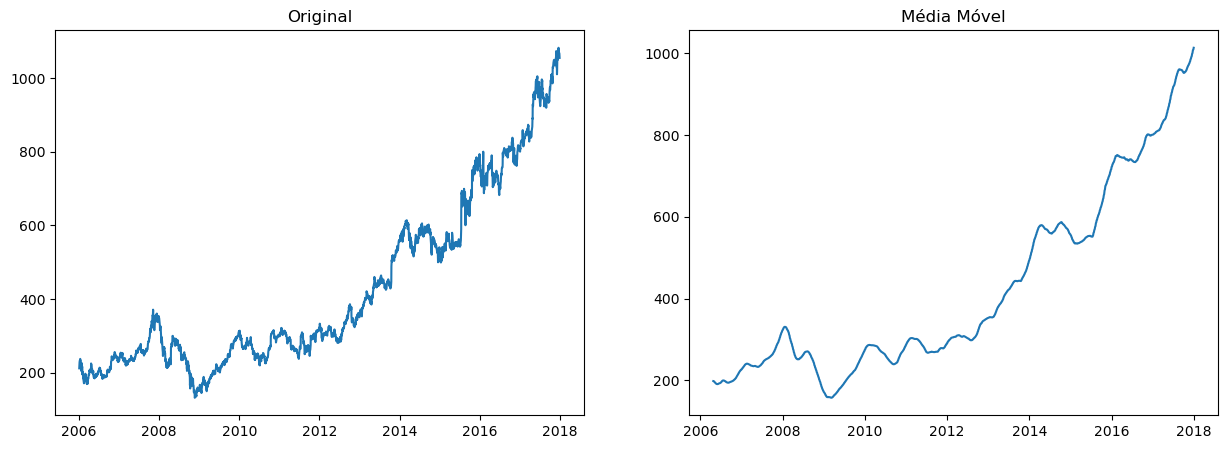

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].plot('Open', data=g_stk)
axes[0].set_title('Original')
 
axes[1].plot('Rolling_mean', data=g_stk)
axes[1].set_title('Média Móvel')

### Suavização Exponencial Simples

In [143]:
data = pd.read_csv('AirPassengers.csv', parse_dates=[
                   'Month'], index_col='Month', date_parser=dateparse)
data.index.freq = 'MS'

C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_11412\3239815258.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('AirPassengers.csv', parse_dates=[


In [102]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [103]:
data.index.freq = 'MS'  # é preciso mostrar a frequencia dos dados - MS é mensal
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(12)

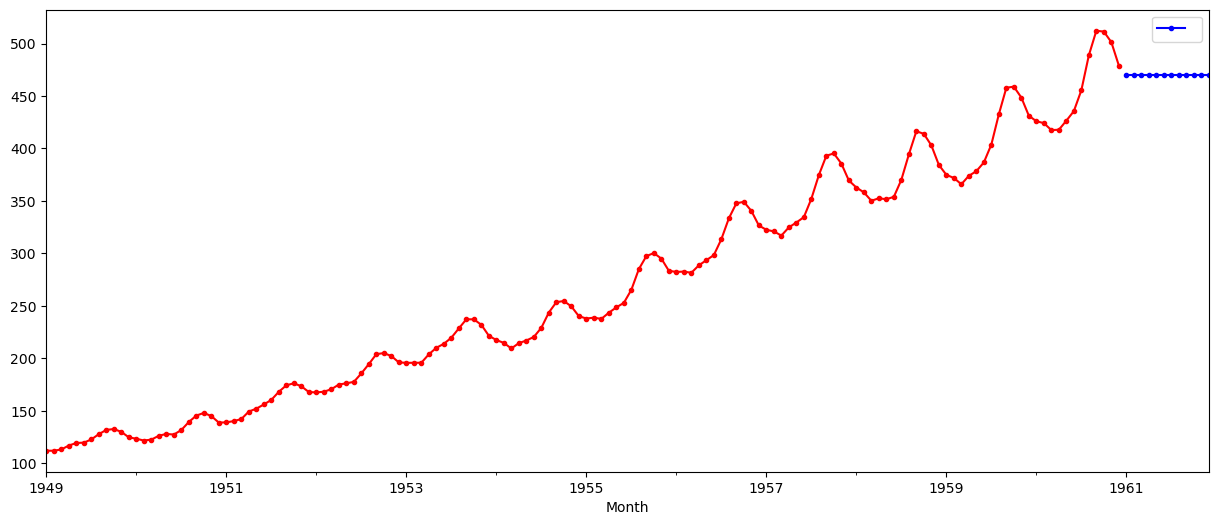

In [104]:
fcast1.plot(marker='.', color='b', legend=True)
fit1.fittedvalues.plot(marker='.', color='red')
plt.show()

In [105]:
# smoothing_tren (beta) 80% de influência na tendência mais atual
fit2 = Holt(data).fit(smoothing_level=0.2,
                      smoothing_trend=0.8, optimized=False)
fcast2 = fit2.forecast(12)

<Axes: xlabel='Month'>

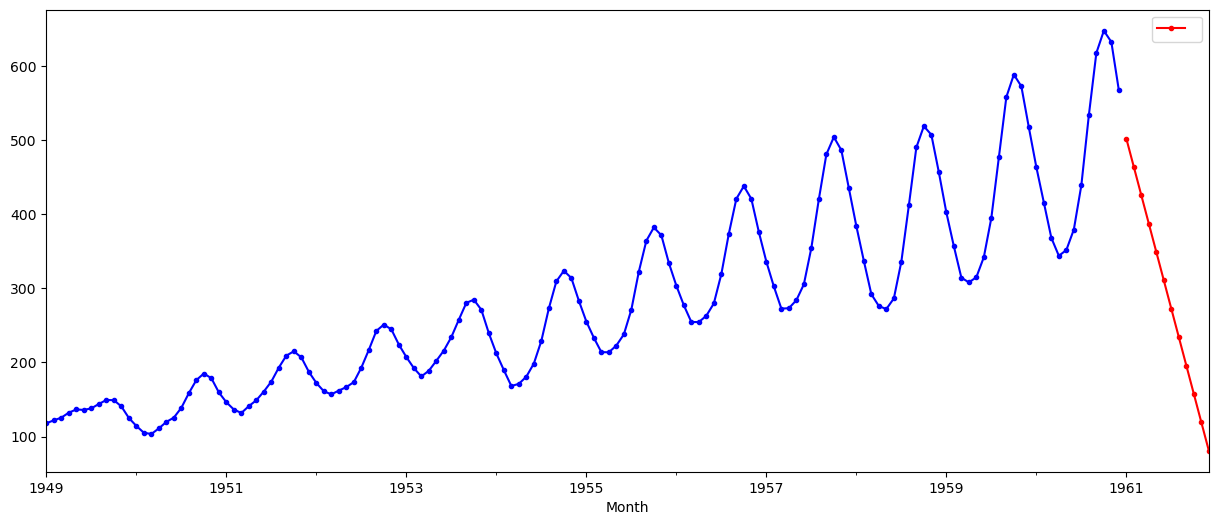

In [106]:
fit2.fittedvalues.plot(marker='.', color='b')
fcast2.plot(color='r', marker='.', legend=True)

### Suavizada

In [107]:
fit3 = Holt(data, damped_trend=True).fit(
    smoothing_level=0.2, smoothing_trend=0.8)
fcast3 = fit3.forecast(12)

<Axes: xlabel='Month'>

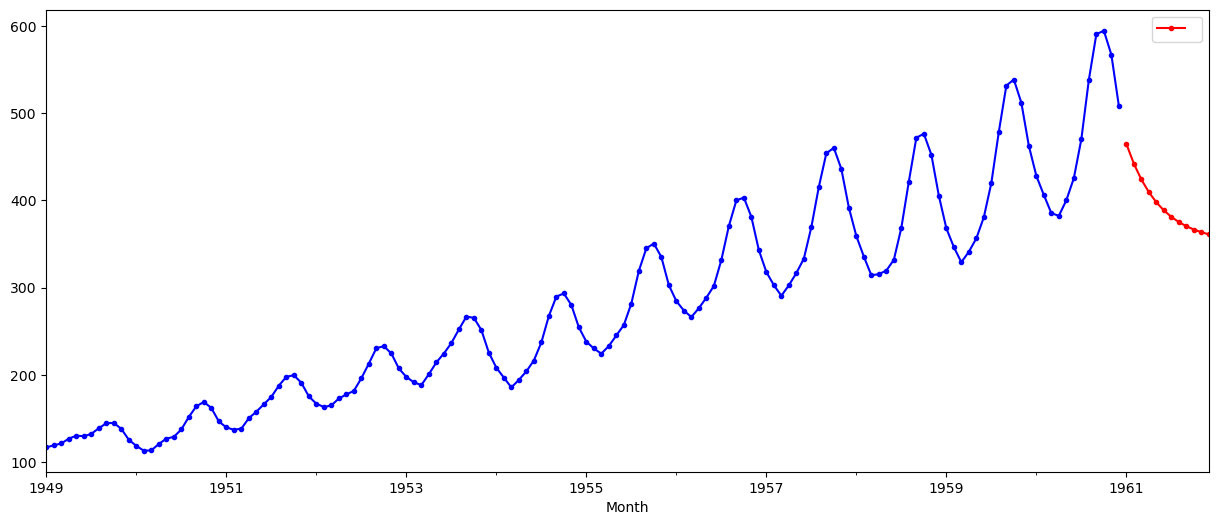

In [108]:
fit3.fittedvalues.plot(marker='.', color='b')
fcast3.plot(color='r', marker='.', legend=True)

### Holt Winters


In [109]:
fit4 = ExponentialSmoothing(data, seasonal_periods=12,
                            trend='additive', seasonal='additive', use_boxcox=True).fit()

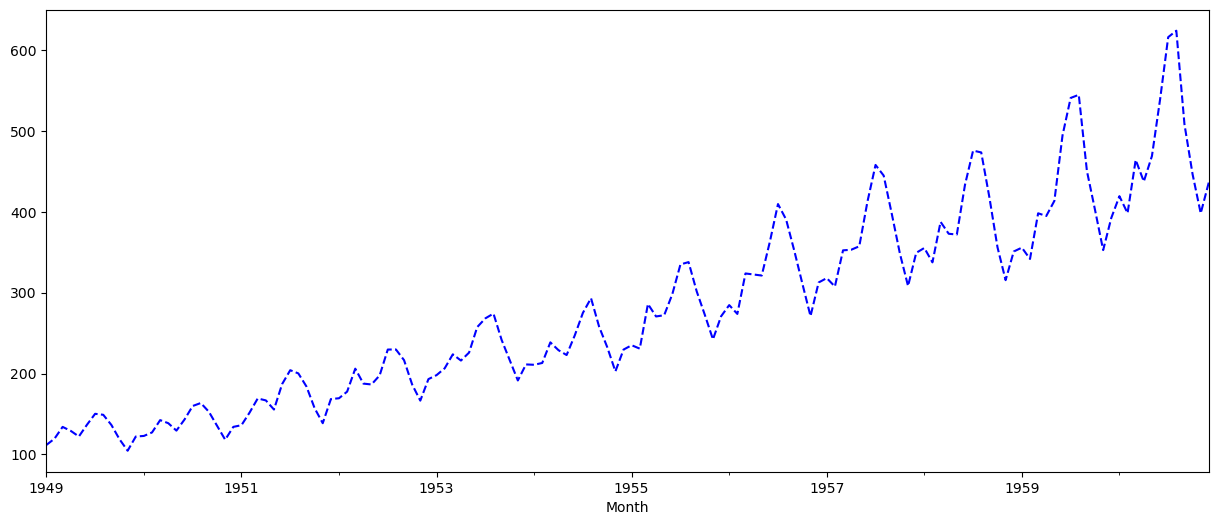

In [110]:
fit4.fittedvalues.plot(style='--', color='b')
plt.show()

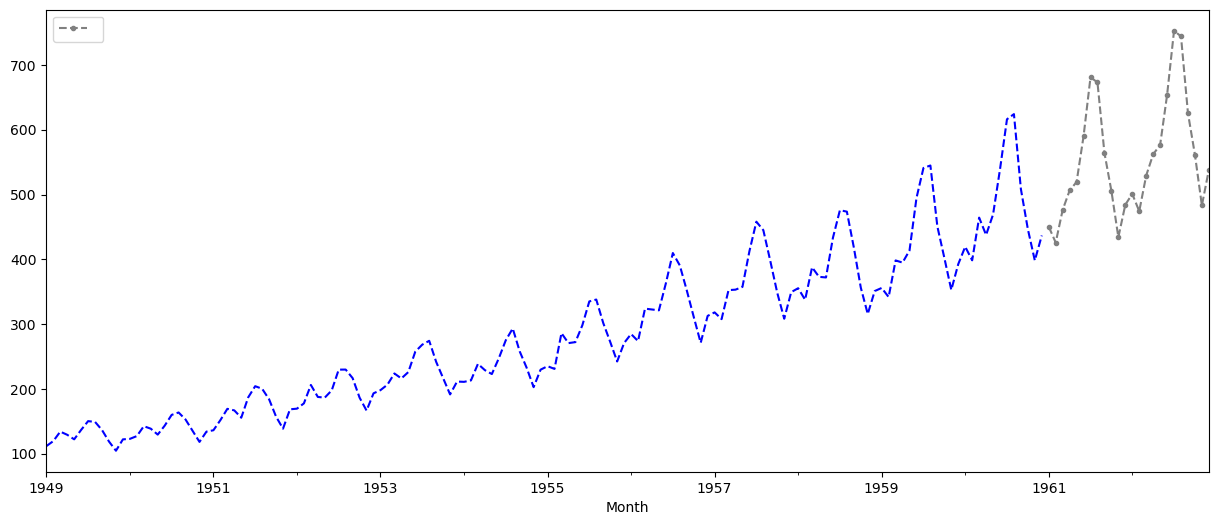

In [111]:
fit4.forecast(24).plot(style='--', marker='.', color='gray', legend=True)
fit4.fittedvalues.plot(style='--', color='b')
plt.show()

# Arima

O ARIMA é um modelo poderoso para previsão de séries temporais, especialmente quando os dados mostram autocorrelações que podem ser capturadas pelos componentes AR e MA. Entender cada componente e como eles se combinam é essencial para construir modelos preditivos eficazes. Como com qualquer modelo estatístico, a seleção cuidadosa dos parâmetros e a consideração das limitações são cruciais para obter previsões confiáveis.

Admito que a fórmula pode ser exaustiva e bem circular, mas só vou deixar uma rápida explicação e te poupar dos cálculos e fórmulas

É uma ótima ferramenta a ser usada para Forecasting. Menos para séries estacionária, aqui aplicamos diferenciação para eliminar ou diminuir a tendência

Entender cada componente é essencial:

* AR (Autoregressivo) - Aqui você está dizendo: "Modelo, o valor de amanhã está bem relacionado com o(s) n último(s) dia(s)." É responsável pela autoregressão do modelo. AR = 2 significa, por exemplo, que a previsão atual depende da correlação com os últimos dois lags. É calculado pelo coeficiente autoregressivo (que pode ser encontrado pela fórmula de Yule-Walker usando os coeficientes de autocorrelação desses lags), multiplicado pelo valor diferenciado (se d = 1, então é a diferença entre o valor atual e o valor anterior). Quanto maior o valor de p, mais períodos passados influenciam o valor atual. Os resíduos do AR serão usados no modelo MA

* I (Diferenciação) - A diferenciação é usada para tornar a série temporal estacionária, eliminando tendências ou sazonalidades. Se a série não for estacionária, o modelo ARIMA pode ter dificuldades em capturar padrões corretamente. 

* MA (Média Móvel) - Aqui você está dizendo: "Modelo, o erro dessa previsão tem relação com o n último(s) dia(s)".  É responsável por atribuir pesos aos resíduos encontrados no modelo AR. O MA visa capturar a influência dos erros passados (resíduos) para melhorar as previsões futuras. Faz isso ajustando a previsão com base nos resíduos passados, procurando reduzir a autocorrelação dos resíduos. Aumentar q significa que resíduos mais antigos têm mais impacto e o melhor lag (o mais autocorrelacionado) ajuda o modelo a ajustar melhor as previsões futuras

Por fim, a previsão final é uma combinação dos componentes AR e MA aplicados aos dados diferenciados. 🫡

Portanto, note a importância: se sua série tiver correlações mais fortes com períodos mais distantes, usar valores menores de p e q pode impactar negativamente seu modelo, e vice-versa

Obs: Aqui usamos o dataset famoso airpassengers.csv, mas a nível didático são bons dados

*** Dica: forecast sempre leva como princípio que a previsão está errada (o mundo é aleatório demais), portanto sempre mostre sua previsão com intervalos de confiança, dê a margem de erro para que seu cliente se prepare melhor.*** 💭

In [112]:
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_11412\3769638270.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)


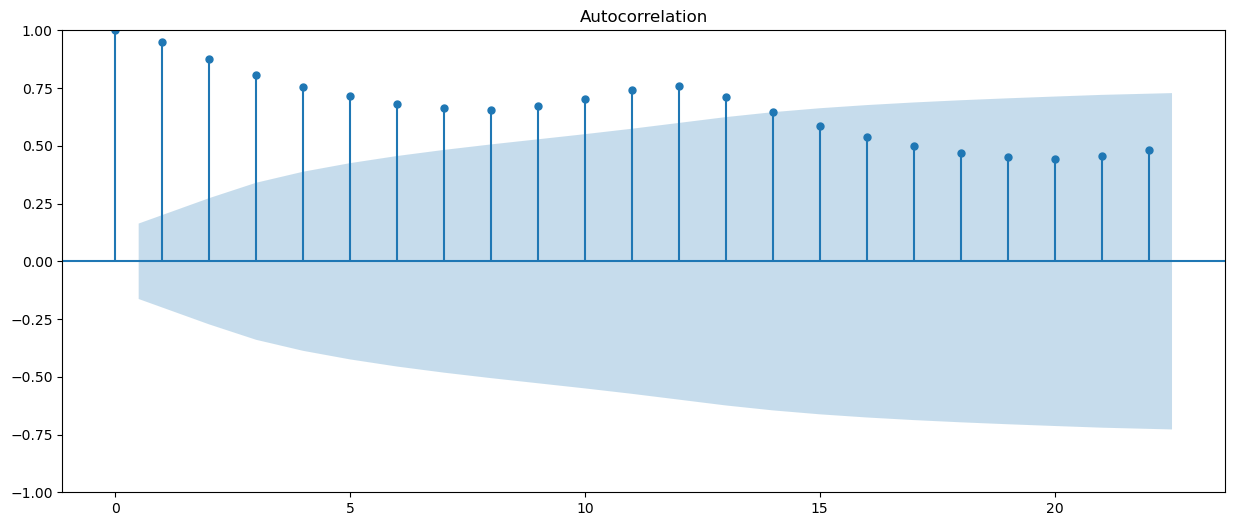

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data) #para parm q
plt.show()

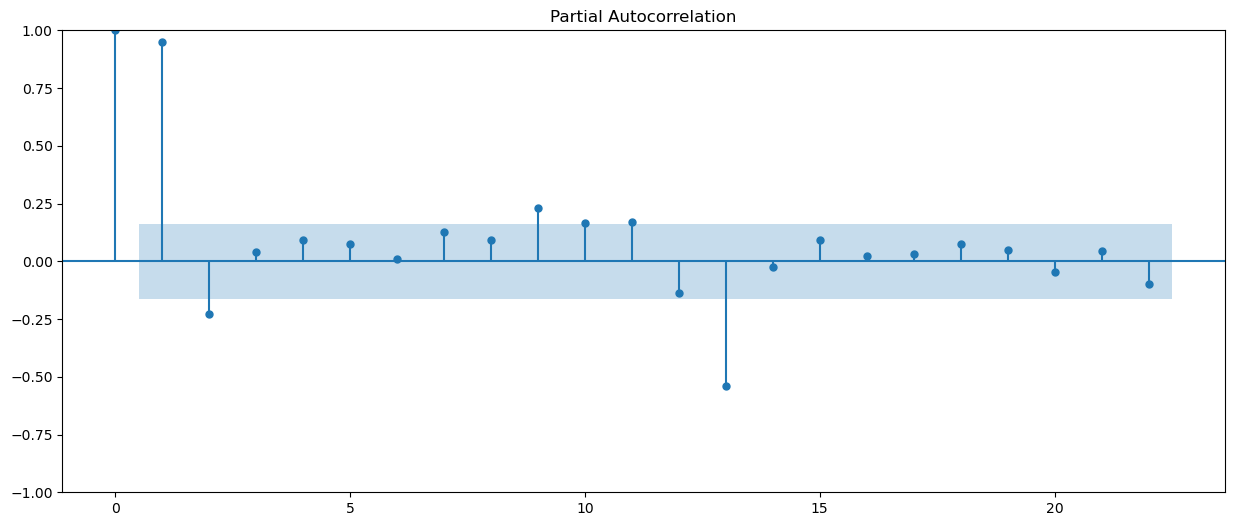

In [114]:
plot_pacf(data, method='ywm') #para parm p
plt.show()

In [115]:
from statsmodels.tsa.arima.model import ARIMA # arima não lê efeitos sazonais, então não podemos esperar um bom modelo visto que os dados possuem

In [116]:
data.index.freq = 'MS'
modelo = ARIMA(data, order=(2,1,1))
model_fit = modelo.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -685.169
Date:                Fri, 23 Aug 2024   AIC                           1378.338
Time:                        18:21:22   BIC                           1390.190
Sample:                    01-01-1949   HQIC                          1383.154
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0907      0.083     13.190      0.000       0.929       1.253
ar.L2         -0.4890      0.097     -5.046      0.000      -0.679      -0.299
ma.L1         -0.8439      0.073    -11.486      0.0

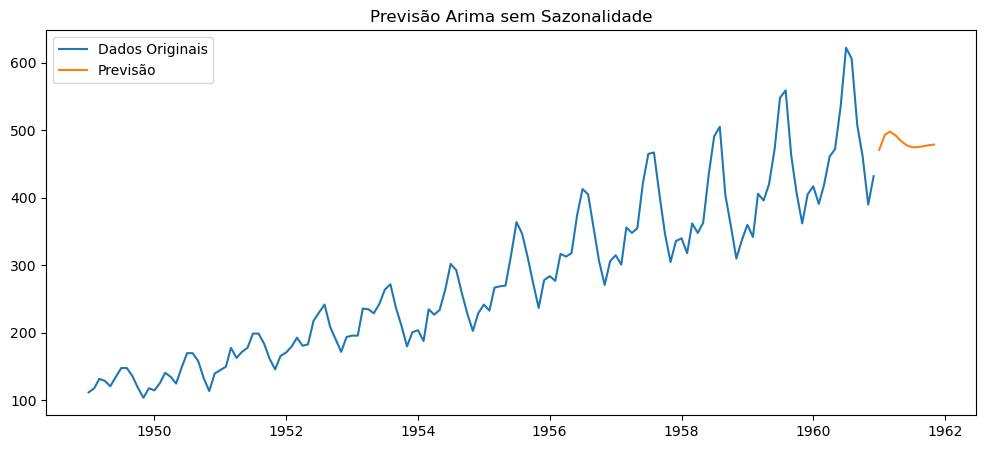

In [117]:
n_periods = 12
forecast = model_fit.forecast(steps=n_periods)
idx = pd.date_range(data.index[-1], periods=n_periods, freq='MS')
forecast_series = pd.Series(forecast, index=idx)
plt.figure(figsize=(12,5))
plt.plot(data, label='Dados Originais')
plt.plot(forecast_series, label='Previsão')
plt.title('Previsão Arima sem Sazonalidade')
plt.legend()
plt.show()

# Arima com sazonalidade

Modelos arimas básicos não capturam sazonalidade, por isso em modelo com a Sazonalidade precisamos capturá-la no modelo também. Também passamos parâmetros AR, I e MA para a sazonalidade sozinha, por isso em séries temporais com sazonalidade precisam ser bem analisadas. 

Aqui usamos o SARIMAX(P, D, Q, M) -> M aqui é o período sazonal, se estamos criando uma série temporal anual, 12 siginifica 12 anos, se meses, 12 meses, se dias 12 dias e assim por diante

In [118]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [119]:
model = SARIMAX(data, order=(0,1,1), seasonal_order=(2,1,0,12))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                         #Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 23 Aug 2024   AIC                           1019.178
Time:                                     18:21:23   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

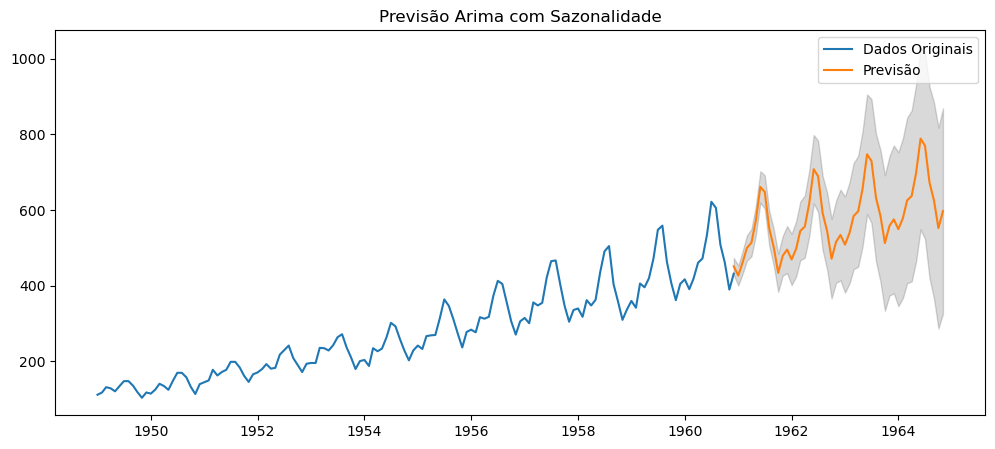

In [120]:

n_periods = 48
forecast_results = model_fit.get_forecast(steps=n_periods)
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()
idx = pd.date_range(data.index[-1], periods=n_periods, freq='MS')

plt.figure(figsize=(12,5))
plt.plot(data, label='Dados Originais')
plt.plot(idx, forecast, label='Previsão')
plt.fill_between(idx, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=.15)
plt.title('Previsão Arima com Sazonalidade')
plt.legend()
plt.show()

# Auto Arima

Um modelo de maior custo computacional, porém melhor já que você pode iniciar seu Arima com parâmetros baixos e o Auto Arima vai testando, exaustivamente, diversos modelos com diversos parâmetros que reduzem os erros e encontrar o melhor modelo para uso. Porém, esse modelo não te permite manipular ele com tanta facilidade. Modelos como Arima ou Sarimax, te permitem moldar o modelo a sua forma</br>

Nem sempre modelos com os menores erros são os melhores, lembre-se disso

AutoArima é um excelente modelo para uma primeira exploração do ARIMA

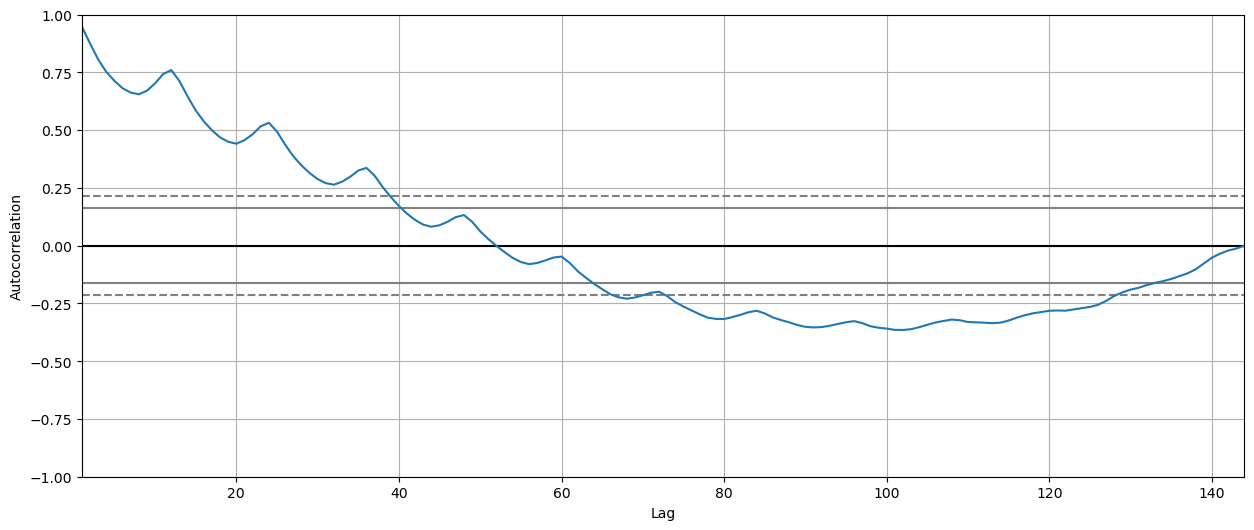

In [121]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data)
plt.show()

In [122]:
from pmdarima.arima import auto_arima

In [123]:
stepwise_model = auto_arima(data, start_p=1, start_q=0, max_p=6, max_q=6, m=12, 
                            start_P=0, start_Q=0, seasonal=True, d=1, D=1, 
                            error_action='ignore', 
                            suppress_warnings=True, stepwise=True)

In [124]:
print(stepwise_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 23 Aug 2024   AIC                           1019.178
Time:                                     18:21:29   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

In [125]:
train = data.loc['1948-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

In [126]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [127]:
future_forecast = stepwise_model.predict(n_periods=12)

future_forecast = pd.DataFrame(future_forecast, index= test.index, columns=["#Passengers"])

In [128]:
real_values = np.array([test['#Passengers']])
predicted_values = np.array([future_forecast['#Passengers']])

# Calcular APE para cada ponto
ape = np.abs((real_values - predicted_values) / real_values) * 100

precision = 100 - ape

print(precision.mean())

96.84678479445472


<Figure size 1000x800 with 0 Axes>

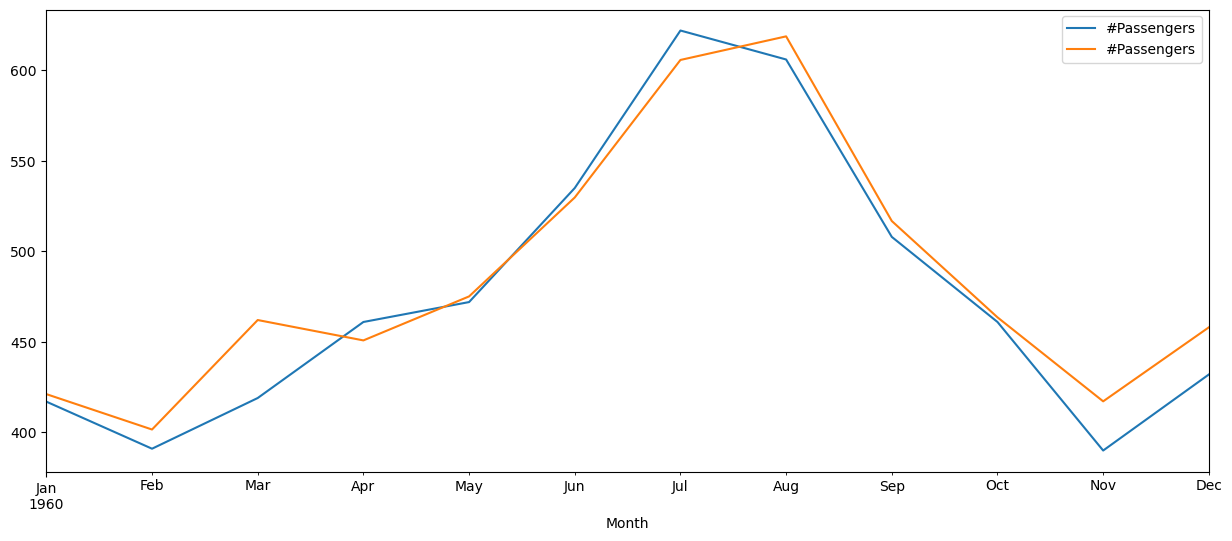

In [129]:
plt.figure(figsize=(10,8))
pd.concat([test, future_forecast], axis=1).plot()
plt.show()

<Figure size 1000x800 with 0 Axes>

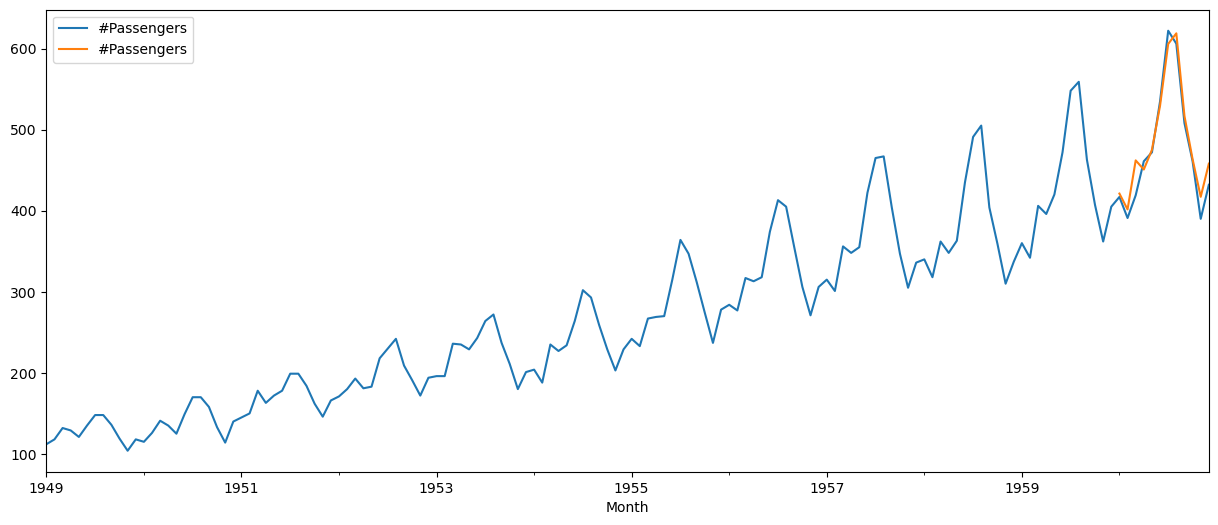

In [130]:
plt.figure(figsize=(10,8))
pd.concat([data, future_forecast], axis=1).plot()
plt.show()

<Axes: ylabel='Count'>

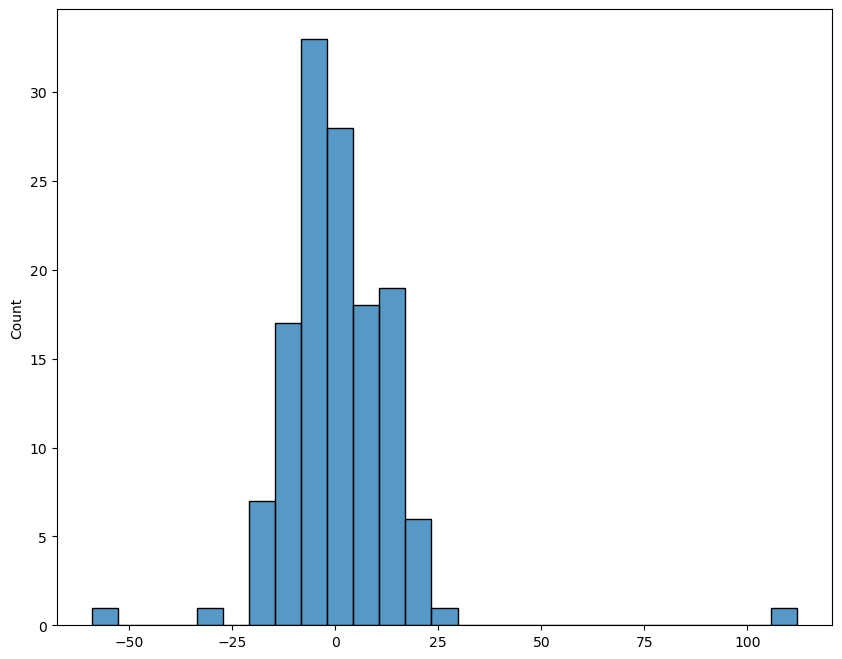

In [131]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.histplot(stepwise_model.resid())

<Axes: xlabel='Month'>

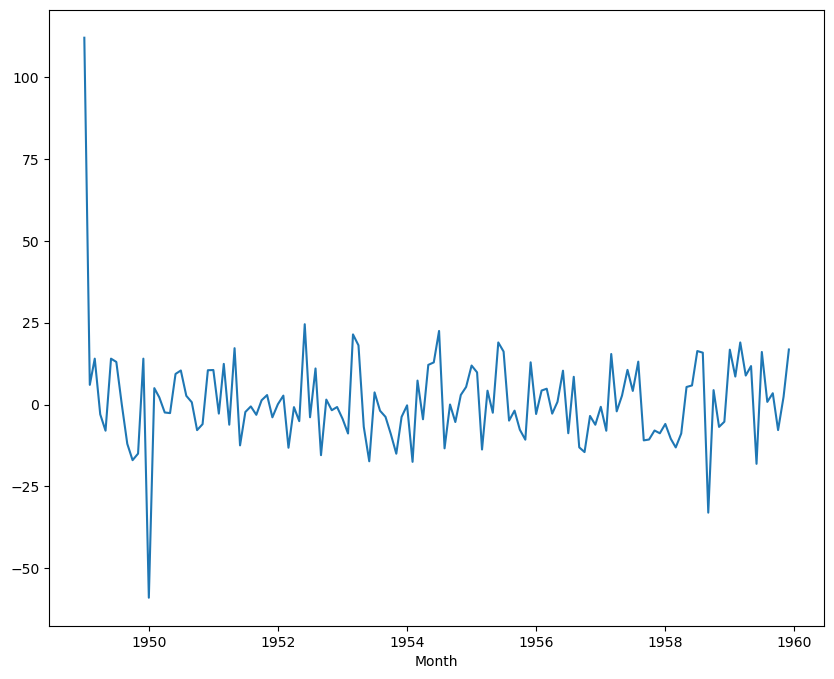

In [132]:
plt.figure(figsize=(10,8))
sns.lineplot(stepwise_model.resid())

In [135]:
stepwise_model.resid().describe()

count    132.000000
mean       1.026469
std       15.155111
min      -59.002105
25%       -6.823910
50%       -0.419335
75%        9.450153
max      112.000000
dtype: float64

In [136]:
adf_test(stepwise_model.resid())

Resultado do teste: 
Teste                    -1.488254e+01
Valor p                   1.601321e-27
# de lags                 0.000000e+00
# de observações          1.310000e+02
Valores Críticos (1%)    -3.481282e+00
Valores Críticos (5%)    -2.883868e+00
Valores Críticos (10%)   -2.578677e+00
dtype: float64


In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

future_forecast = stepwise_model.predict(n_periods=12)

mae_arima = mean_absolute_error(test, future_forecast)
rmse_arima = np.sqrt(mean_squared_error(test, future_forecast))
mape_arima = mean_absolute_percentage_error(test, future_forecast)

print(f'MAE: {mae_arima:.2F}')
print(f'RMSE: {rmse_arima:.2F}')
print(f'MAPE: {mape_arima:.2%}')

MAE: 14.16
RMSE: 18.38
MAPE: 3.15%


C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_11412\4042383500.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('AirPassengers.csv', parse_dates=[


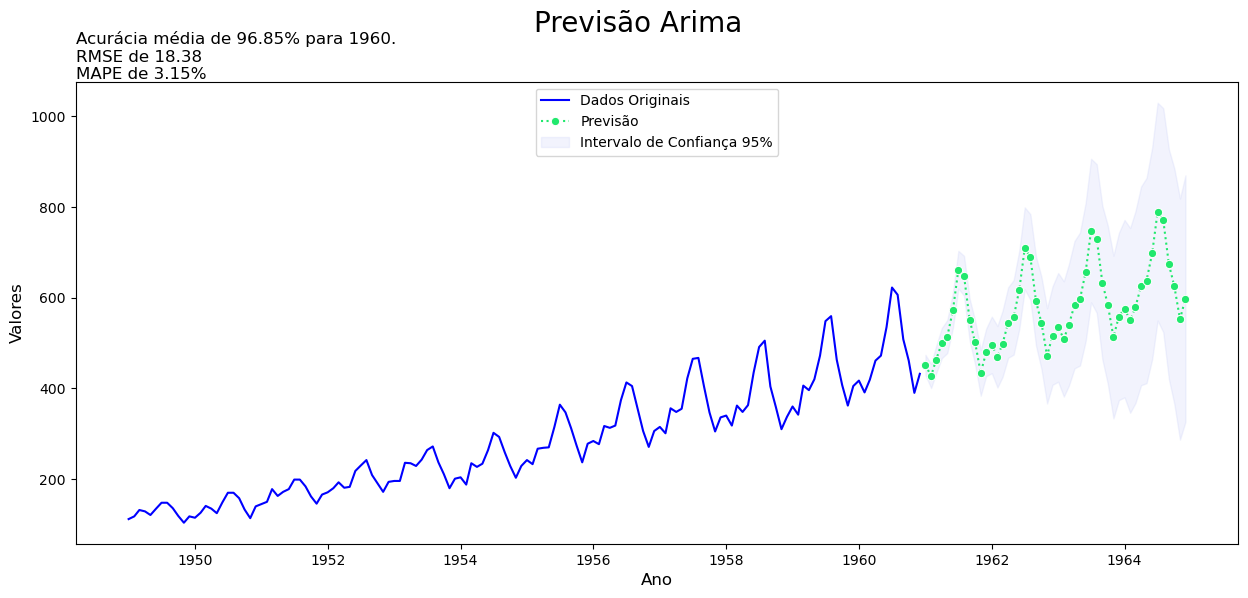

In [152]:
data = pd.read_csv('AirPassengers.csv', parse_dates=[
                   'Month'], index_col='Month', date_parser=dateparse)
data.index.freq = 'MS'

stepwise_model = auto_arima(data, start_p=1, start_q=0, max_p=6, max_q=6, m=12, 
                            start_P=0, start_Q=0, seasonal=True, d=1, D=1, 
                            error_action='ignore', 
                            suppress_warnings=True, stepwise=True)

future_forecast, conf_int = stepwise_model.predict(n_periods=48, return_conf_int=True)
future_forecast = pd.DataFrame(future_forecast,  columns=["#Passengers"])
future_forecast['Menor'] = conf_int[:, 0]
future_forecast['Maior'] = conf_int[:, 1]

plt.figure(figsize=(15,6))
sns.lineplot(data['#Passengers'], 
             label='Dados Originais', 
             linestyle='-', color='b')
sns.lineplot(future_forecast['#Passengers'], 
             label='Previsão', 
             linestyle='dotted', marker='o', color='#21E86D')
plt.fill_between(future_forecast.index, 
                 future_forecast['Menor'], future_forecast['Maior'], 
                 color='#A9B2F3', alpha=0.15, label='Intervalo de Confiança 95%')
plt.text(f'Acurácia média de {precision.mean():.2f}% para 1960.\nRMSE de {rmse_arima.mean():.2f}\nMAPE de {mape_arima.mean():.2%}'
          ,fontsize=12, loc='left', pad=0)
plt.suptitle('Previsão Arima', 
             fontsize=20, x=0.5, y=1)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.legend(loc='upper center')
plt.show()

In [139]:
future_forecast.loc['1961-01-01':'1961-12-01']

,#Passengers,Menor,Maior
1961-01-01,477.622900,414.339292,540.906508
1961-02-01,458.805593,389.346180,528.265005
1961-03-01,522.529614,447.400360,597.658869
1961-04-01,511.975104,431.574857,592.375352
1961-05-01,537.552525,452.206203,622.898847
1961-06-01,589.040112,499.019061,679.061163
1961-07-01,667.917699,573.452972,762.382425
1961-08-01,680.319070,581.610512,779.027629
1961-09-01,579.618277,476.840972,682.395582
1961-10-01,524.551887,417.860887,631.242886


In [156]:
from prophet import Prophet 